In [1]:
import pandas as pd
import yellowbrick

In [2]:
#Step 1:  Load data into a dataframe
data = pd.read_csv("C:\\Users\\Gabe\\Documents\\Bellevue University\\Data Mining\\Project\\Data\\top-spotify-songs-from-20102019-by-year\\top10s.csv", encoding = 'ISO-8859-1')

In [3]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

# Break data into object not including text or song number
data_values = data[["pop", "spch", "bpm", "nrgy", "dnce", "live", "val", "dur", "acous"]]
print("The dimension of the details table is: ", data_values.shape)

The dimension of the table is:  (603, 15)
The dimension of the details table is:  (603, 9)


In [4]:
#Step 3:  Look at the data
print(data.head(5))

   song number                 title      artist        top genre  year  bpm  \
0            1      Hey, Soul Sister       Train       neo mellow  2010   97   
1            2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2            3               TiK ToK       Kesha        dance pop  2010  120   
3            4           Bad Romance   Lady Gaga        dance pop  2010  119   
4            5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78  


In [5]:
#Step 4:  what type of variables are in the table
print("Describe Data")
print(data.describe())
print("")
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       song number         year         bpm        nrgy        dnce  \
count   603.000000   603.000000  603.000000  603.000000  603.000000   
mean    302.000000  2014.592040  118.545605   70.504146   64.379768   
std     174.215384     2.607057   24.795358   16.310664   13.378718   
min       1.000000  2010.000000    0.000000    0.000000    0.000000   
25%     151.500000  2013.000000  100.000000   61.000000   57.000000   
50%     302.000000  2015.000000  120.000000   74.000000   66.000000   
75%     452.500000  2017.000000  129.000000   82.000000   73.000000   
max     603.000000  2019.000000  206.000000   98.000000   97.000000   

               dB        live         val         dur       acous        spch  \
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000   
mean    -5.578773   17.774461   52.225539  224.674959   14.326700    8.358209   
std      2.798020   13.102543   22.513020   34.130059   20.766165    7.483162   
min    -60.000000    0

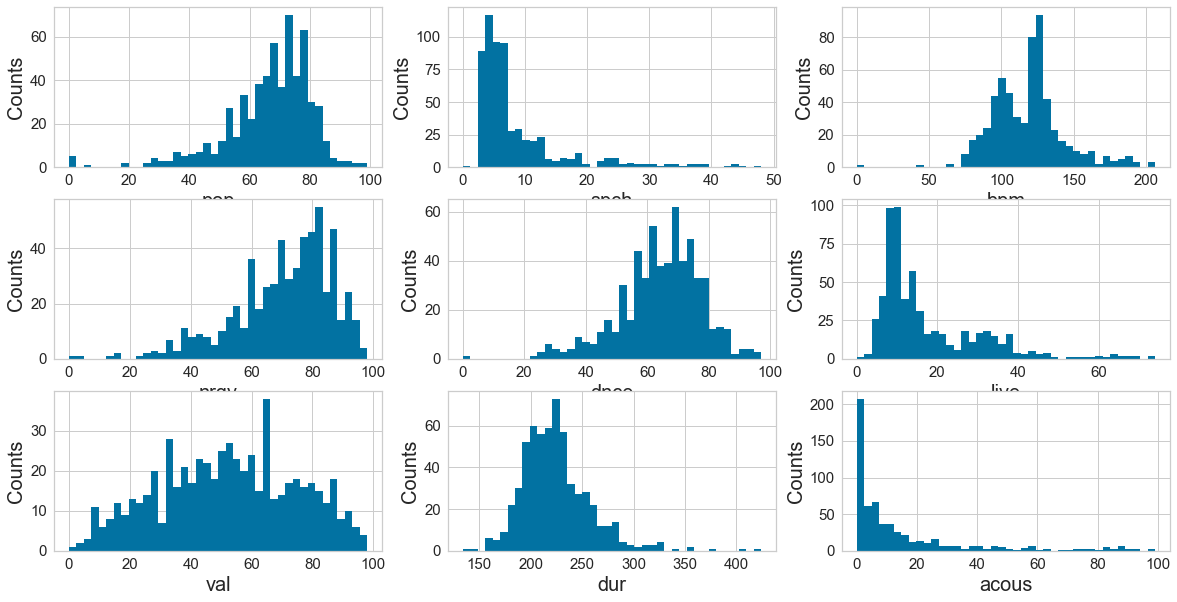

In [6]:
#Step 5: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)

# Specify the features of interest
num_features = ['pop','spch', 'bpm', 'nrgy', 'dnce', 'live', 'val', 'dur', 'acous']
xaxes = num_features
yaxes = ['Counts','Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

C:\Users\Gabe\Anaconda3\lib\site-packages\yellowbrick\features\rankd.py:216: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


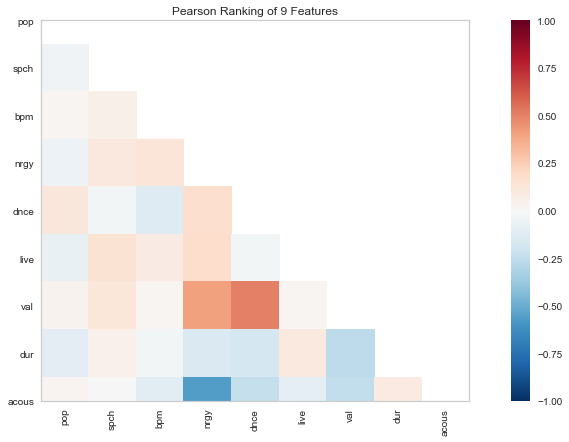

In [7]:
#Step 6: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
import numpy as np
X = np.asmatrix(data[num_features])

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof() # Draw/show/poof the data
plt.show()

In [11]:
# Step 7 Log-transformation
import numpy as np

# log-transformation method using numpy
def log_transformation(data):
    return data.apply(np.log1p)

# check the data for popularity
data['Pop_log1p'] = log_transformation(data['pop'])
print(data.describe())

       song number         year         bpm        nrgy        dnce  \
count   603.000000   603.000000  603.000000  603.000000  603.000000   
mean    302.000000  2014.592040  118.545605   70.504146   64.379768   
std     174.215384     2.607057   24.795358   16.310664   13.378718   
min       1.000000  2010.000000    0.000000    0.000000    0.000000   
25%     151.500000  2013.000000  100.000000   61.000000   57.000000   
50%     302.000000  2015.000000  120.000000   74.000000   66.000000   
75%     452.500000  2017.000000  129.000000   82.000000   73.000000   
max     603.000000  2019.000000  206.000000   98.000000   97.000000   

               dB        live         val         dur       acous        spch  \
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000   
mean    -5.578773   17.774461   52.225539  224.674959   14.326700    8.358209   
std      2.798020   13.102543   22.513020   34.130059   20.766165    7.483162   
min    -60.000000    0.000000    0.0

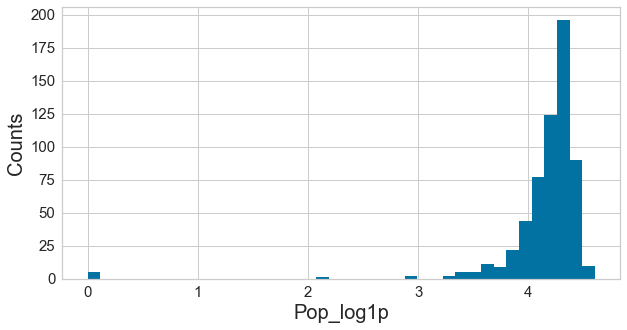

In [12]:
# Step 8: check the distribution using histogram
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Pop_log1p'], bins=40)
plt.xlabel('Pop_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [8]:
# Step 9: Feature Selection with Univariate Statistical Tests
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression, chi2

# Create feature and target variable for Popularity problem
X_reg = data_values.iloc[:,1:8]
Y_reg = data_values.iloc[:,0]
# feature extraction
regression_new = SelectKBest(score_func=f_regression, k=3).fit_transform(X_reg, Y_reg)
print(regression_new[:5])
print(X_reg.head())


[[ 67   8 217]
 [ 75  52 263]
 [ 76  29 200]
 [ 70   8 295]
 [ 64   9 221]]
   spch  bpm  nrgy  dnce  live  val  dur
0     4   97    89    67     8   80  217
1    23   87    93    75    52   64  263
2    14  120    84    76    29   71  200
3     4  119    92    70     8   71  295
4     4  109    84    64     9   43  221
